# Saving and reading spatially averaged field data

## Writing data to file

We generally want to save some of the simulation data when we run a simulation. Saving the average magnetisation vector as a function of time is a common task, and one method of doing this explicitly is describe here.

In [1]:
import numpy
import finmag
import sys

[2014-06-09 15:52:30] INFO: Finmag logging output will be appended to file: '/home/albert/.finmag/global.log'
[2014-06-09 15:52:30] DEBUG: Building modules in 'native'...
[2014-06-09 15:52:31] DEBUG: FinMag          5031:181e7b67713b0d377857cf9e722e70d0c1be4301
[2014-06-09 15:52:31] DEBUG: Dolfin          1.4.0                Matplotlib      1.3.1               
[2014-06-09 15:52:31] DEBUG: Numpy           1.8.1                Scipy           0.12.0              
[2014-06-09 15:52:31] DEBUG: IPython         2.1.0                Python          2.7.5+              
[2014-06-09 15:52:31] DEBUG: Paraview        4.0.1-1              Sundials        2.5.0               
[2014-06-09 15:52:31] DEBUG: Boost-Python    <unknown>            Linux           Linux Mint 16 Petra 
[2014-06-09 15:52:31] DEBUG: Registering debug signal handler. Press Ctrl-Z at any time to stop execution and jump into the debugger.


The `bar()` function provides a simulation object for a Permalloy bar with dimensions 30x30x100nm with the initial magnetisation pointing into the (1,0,1) direction. The `barmini()` function is a miniature analogue which runs much faster and is used in this demonstration.

In [12]:
sim = finmag.example.barmini()

[2014-06-09 15:54:19] INFO: Finmag logging output will be written to file: '/home/albert/work/code/finmag/doc/ipython_notebooks_src/barmini.log' (any old content will be overwritten).
[2014-06-09 15:54:19] DEBUG: Creating DataWriter for file 'barmini.ndt'
[2014-06-09 15:54:19] INFO: Creating Sim object 'barmini' (rank=0/1).
[2014-06-09 15:54:19] INFO: <Mesh of topological dimension 3 (tetrahedra) with 45 vertices and 96 cells, ordered>
[2014-06-09 15:54:19] DEBUG: Creating LLG object.
[2014-06-09 15:54:19] DEBUG: Creating Exchange object with method box-matrix-petsc, in Jacobian.
[2014-06-09 15:54:19] DEBUG: Adding interaction Exchange to simulation.
[2014-06-09 15:54:19] DEBUG: Creating Demag object with solver 'FK'.
[2014-06-09 15:54:19] DEBUG: Adding interaction Demag to simulation.
[2014-06-09 15:54:19] DEBUG: Successfully created simulation 'barmini'


### Low-level approach

We create the object (``tablef``) that writes the spatially averaged data into a file. This is similar to OOMMF's odt files (Oommf Data Table) and Nmag's ndt files (Nmag Data Table).

In [13]:
import finmag.util
import finmag.util.fileio
tablef = finmag.util.fileio.Tablewriter('data.ndt', sim, override = True)

[2014-06-09 15:54:22] DEBUG: Creating DataWriter for file 'data.ndt'


And run a simulation in small chunks of time to demonstrate the basic idea:

In [14]:
for time in numpy.linspace(0, 1e-10, 20):
    print("Integrating towards t = %gs" % time)
    sys.stdout.flush()
    sim.run_until(time)
    tablef.save()
print("Done"),

Integrating towards t = 0s


[2014-06-09 15:54:24] INFO: Create integrator sundials with kwargs={}
[2014-06-09 15:54:24] DEBUG: Creating integrator with backend sundials.
[2014-06-09 15:54:24] INFO: Simulation will run until t = 0 s.
[2014-06-09 15:54:24] INFO: Simulation has reached time t = 0 s.


Integrating towards t = 5.26316e-12s


[2014-06-09 15:54:24] INFO: Simulation will run until t = 5.3e-12 s.
[2014-06-09 15:54:24] INFO: Simulation has reached time t = 5.3e-12 s.


Integrating towards t = 1.05263e-11s


[2014-06-09 15:54:24] INFO: Simulation will run until t = 1.1e-11 s.
[2014-06-09 15:54:24] INFO: Simulation has reached time t = 1.1e-11 s.


Integrating towards t = 1.57895e-11s


[2014-06-09 15:54:24] INFO: Simulation will run until t = 1.6e-11 s.
[2014-06-09 15:54:24] INFO: Simulation has reached time t = 1.6e-11 s.


Integrating towards t = 2.10526e-11s


[2014-06-09 15:54:24] INFO: Simulation will run until t = 2.1e-11 s.
[2014-06-09 15:54:24] INFO: Simulation has reached time t = 2.1e-11 s.


Integrating towards t = 2.63158e-11s


[2014-06-09 15:54:24] INFO: Simulation will run until t = 2.6e-11 s.
[2014-06-09 15:54:24] INFO: Simulation has reached time t = 2.6e-11 s.


Integrating towards t = 3.15789e-11s


[2014-06-09 15:54:24] INFO: Simulation will run until t = 3.2e-11 s.
[2014-06-09 15:54:24] INFO: Simulation has reached time t = 3.2e-11 s.


Integrating towards t = 3.68421e-11s


[2014-06-09 15:54:24] INFO: Simulation will run until t = 3.7e-11 s.
[2014-06-09 15:54:24] INFO: Simulation has reached time t = 3.7e-11 s.


Integrating towards t = 4.21053e-11s


[2014-06-09 15:54:24] INFO: Simulation will run until t = 4.2e-11 s.
[2014-06-09 15:54:24] INFO: Simulation has reached time t = 4.2e-11 s.


Integrating towards t = 4.73684e-11s


[2014-06-09 15:54:24] INFO: Simulation will run until t = 4.7e-11 s.
[2014-06-09 15:54:24] INFO: Simulation has reached time t = 4.7e-11 s.


Integrating towards t = 5.26316e-11s


[2014-06-09 15:54:24] INFO: Simulation will run until t = 5.3e-11 s.
[2014-06-09 15:54:24] INFO: Simulation has reached time t = 5.3e-11 s.


Integrating towards t = 5.78947e-11s


[2014-06-09 15:54:24] INFO: Simulation will run until t = 5.8e-11 s.
[2014-06-09 15:54:24] INFO: Simulation has reached time t = 5.8e-11 s.


Integrating towards t = 6.31579e-11s


[2014-06-09 15:54:24] INFO: Simulation will run until t = 6.3e-11 s.
[2014-06-09 15:54:24] INFO: Simulation has reached time t = 6.3e-11 s.


Integrating towards t = 6.84211e-11s


[2014-06-09 15:54:24] INFO: Simulation will run until t = 6.8e-11 s.
[2014-06-09 15:54:24] INFO: Simulation has reached time t = 6.8e-11 s.


Integrating towards t = 7.36842e-11s


[2014-06-09 15:54:24] INFO: Simulation will run until t = 7.4e-11 s.
[2014-06-09 15:54:24] INFO: Simulation has reached time t = 7.4e-11 s.


Integrating towards t = 7.89474e-11s


[2014-06-09 15:54:24] INFO: Simulation will run until t = 7.9e-11 s.
[2014-06-09 15:54:25] INFO: Simulation has reached time t = 7.9e-11 s.


Integrating towards t = 8.42105e-11s


[2014-06-09 15:54:25] INFO: Simulation will run until t = 8.4e-11 s.
[2014-06-09 15:54:25] INFO: Simulation has reached time t = 8.4e-11 s.


Integrating towards t = 8.94737e-11s


[2014-06-09 15:54:25] INFO: Simulation will run until t = 8.9e-11 s.
[2014-06-09 15:54:25] INFO: Simulation has reached time t = 8.9e-11 s.


Integrating towards t = 9.47368e-11s


[2014-06-09 15:54:25] INFO: Simulation will run until t = 9.5e-11 s.
[2014-06-09 15:54:25] INFO: Simulation has reached time t = 9.5e-11 s.


Integrating towards t = 1e-10s


[2014-06-09 15:54:25] INFO: Simulation will run until t = 1e-10 s.
[2014-06-09 15:54:25] INFO: Simulation has reached time t = 1e-10 s.


Done


Each call of ``tablef.save()`` saves the current time and spatially averaged values of the magnetisation into the data file. This will be extended to also save other fields in the future. We can inspect the data file which is just an text file:

In [9]:
!cat data.ndt

#               time                m_x                m_y                m_z 
#                <s>                 <>                 <>                 <> 
                   0     0.707106781187                  0     0.707106781187 
   5.26315789474e-12     0.660830608443     0.102431836773     0.743493357301 
   1.05263157895e-11     0.598004836982     0.194848725254     0.777428610565 
   1.57894736842e-11     0.521065455993     0.273289470043     0.808564099508 
   2.10526315789e-11     0.433538764465     0.334626812167     0.836685564067 
   2.63157894737e-11     0.339694945052      0.37687088209     0.861714300164 
   3.15789473684e-11     0.244133503946     0.399330181318     0.883692656166 
   3.68421052632e-11      0.15135137213     0.402612607613     0.902760357397 
   4.21052631579e-11    0.0653703104822     0.388479518357     0.919126279411 
   4.73684210526e-11   -0.0105541568917     0.359592263978     0.933041632879 
   5.26315789474e-11   -0.0740982195878     0.319206

### High-level approach

These commands shown above are fairly low level commands, which are wrapped up in the simulation method ``save_averages`` for end-user convenience. using the scheduler system, the above loop can be much more conveniently written as follows.

In [10]:
sim = finmag.example.barmini()
sim.schedule('save_averages', every=5e-12)
sim.run_until(1e-10)

[2014-06-09 15:53:26] INFO: Finmag logging output will be written to file: '/home/albert/work/code/finmag/doc/ipython_notebooks_src/barmini.log' (any old content will be overwritten).
[2014-06-09 15:53:26] DEBUG: Creating DataWriter for file 'barmini.ndt'
[2014-06-09 15:53:26] INFO: Creating Sim object 'barmini' (rank=0/1).
[2014-06-09 15:53:26] INFO: <Mesh of topological dimension 3 (tetrahedra) with 45 vertices and 96 cells, ordered>
[2014-06-09 15:53:26] DEBUG: Creating LLG object.
[2014-06-09 15:53:26] DEBUG: Creating Exchange object with method box-matrix-petsc, in Jacobian.
[2014-06-09 15:53:26] DEBUG: Adding interaction Exchange to simulation.
[2014-06-09 15:53:26] DEBUG: Creating Demag object with solver 'FK'.
[2014-06-09 15:53:26] DEBUG: Adding interaction Demag to simulation.
[2014-06-09 15:53:26] DEBUG: Successfully created simulation 'barmini'
[2014-06-09 15:53:26] INFO: Create integrator sundials with kwargs={}
[2014-06-09 15:53:26] DEBUG: Creating integrator with backend 

The data is automatically saved to a `.ndt` file with the same name as the simulation (`barmini` in this case). Note that this file contains many more columns, which correspond to the average energy and field values of the various interactions (in this case the exchange and demag interactions).

In [11]:
!head -n4 barmini.ndt

#               time            E_Demag         E_Exchange            E_total          H_Demag_x          H_Demag_y          H_Demag_z       H_Exchange_x       H_Exchange_y       H_Exchange_z          H_total_x          H_total_y          H_total_z             dmdt_x             dmdt_y             dmdt_z       last_step_dt                m_x                m_y                m_z              steps 
#                <s>                <J>                <J>                <J>              <A/m>              <A/m>              <A/m>              <A/m>              <A/m>              <A/m>              <A/m>              <A/m>              <A/m>             <A/ms>             <A/ms>             <A/ms>                <1>                 <>                 <>                 <>                <1> 
                   0  9.99434122264e-21                  0  9.99434122264e-21     -210808.743122     -19907.0801882     -70862.1056989 -1.89115971695e-09                  0 -1.89115971695e-09     

The most convenient way of reading back this data is by using the `Tablereader`, which is described in the next section.

## Reading and processing data

In [8]:
data = finmag.util.fileio.Tablereader('barmini.ndt')

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:1595: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


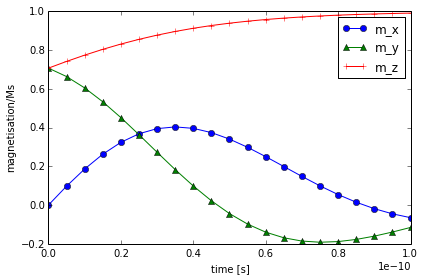

In [9]:
%matplotlib inline
import pylab
pylab.plot(data['time'], data['m_y'], 'o-', label='m_x')
pylab.plot(data['time'], data['m_x'], '^-', label='m_y')
pylab.plot(data['time'], data['m_z'], '+-', label='m_z')
pylab.xlabel('time [s]')
pylab.ylabel('magnetisation/Ms') 
pylab.legend()

It is possible to read multiple columns at once by providing multiple field names (which returns a 2-dimensional numpy array with as many columns). We use this to illustrate an alternative way of plotting the above data.

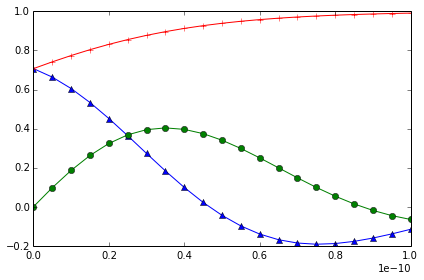

In [10]:
import numpy
t = data['time']
mx, my, mz = data['m_x', 'm_y', 'm_z']
pylab.plot(t, mx, '^-')
pylab.plot(t, my, 'o-')
pylab.plot(t, mz, '+-')

The ``Reader`` object has an extra ``read()`` method which reads the file again. This can be used if the data has changed:


In [11]:
lastt = data['time'][-1] #last saved time in file
print(lastt)

1e-10


In [12]:
sim.run_until(lastt + 15e-12)
tablef.save()

[2014-06-09 15:44:59] INFO: Simulation will run until t = 1.2e-10 s.
[2014-06-09 15:44:59] DEBUG: Saving data to ndt file at t=1.05e-10 (sim.name=barmini).
[2014-06-09 15:44:59] DEBUG: Saving data to ndt file at t=1.1e-10 (sim.name=barmini).
[2014-06-09 15:44:59] DEBUG: Saving data to ndt file at t=1.15e-10 (sim.name=barmini).
[2014-06-09 15:44:59] INFO: Simulation has reached time t = 1.1e-10 s.


In [13]:
data['time'][-1]

1e-10

In [14]:
data.reload()
data.timesteps()[-1]

1.15e-10